<a href="https://colab.research.google.com/github/Amirhosseinpoor/AI_Course/blob/main/HW1/AI_HW1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib numpy scipy

In [ ]:
!pip install --upgrade --no-cache-dir gdown

!gdown '1v4EFN_FSnWpTHu7AN443CN-YI-STIpc6'


Downloading...
From (original): https://drive.google.com/uc?id=1v4EFN_FSnWpTHu7AN443CN-YI-STIpc6
From (redirected): https://drive.google.com/uc?id=1v4EFN_FSnWpTHu7AN443CN-YI-STIpc6&confirm=t&uuid=3da378ba-4a39-41ee-9ab4-256be8ee584d
To: /content/112.mat
100% 7.77M/7.77M [00:00<00:00, 91.4MB/s]


In [ ]:
from scipy import io

data = io.loadmat('112.mat')



In [ ]:
print(type(data))
print(data.keys())
signal = data['X112_DE_time']

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X112_DE_time', 'X112_FE_time', 'X112RPM'])


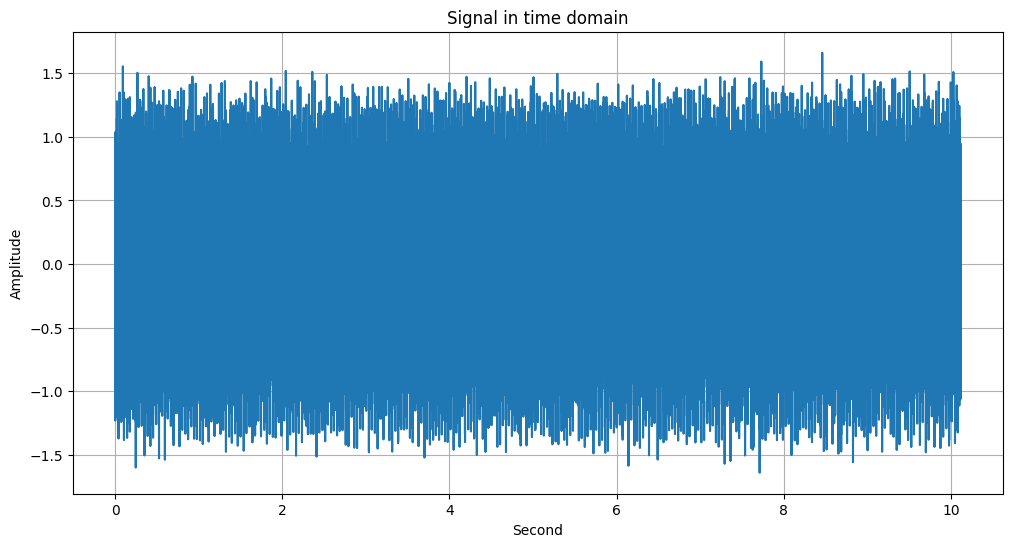

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fs = 48000
ts = 1 / fs
time = np.arange(0, ts * len(signal), ts)

plt.figure(figsize=(12, 6))
plt.plot(time, signal)
plt.title('Signal in time domain')
plt.xlabel('Second')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

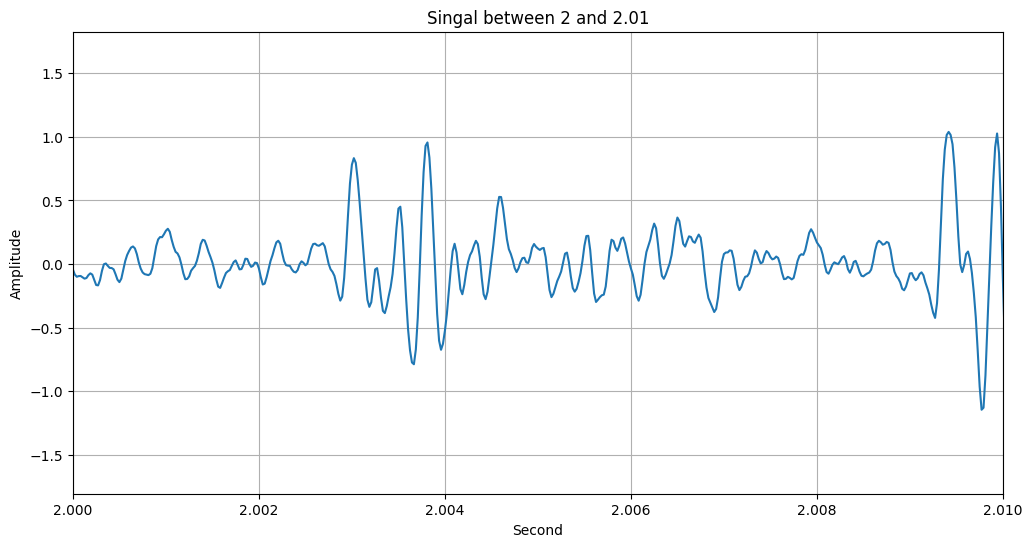

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time, signal)
plt.title('Singal between 2 and 2.01')
plt.xlabel('Second')
plt.ylabel('Amplitude')
plt.xlim(2,2.01)
plt.grid(True)
plt.show()

In [ ]:

def fourier_transform(fs, signal):
    N = len(signal)
    SIGNAL = np.fft.fft(signal)
    f = np.fft.fftfreq(N, 1/fs)
    return f[:N // 2], np.abs(SIGNAL[:N // 2])


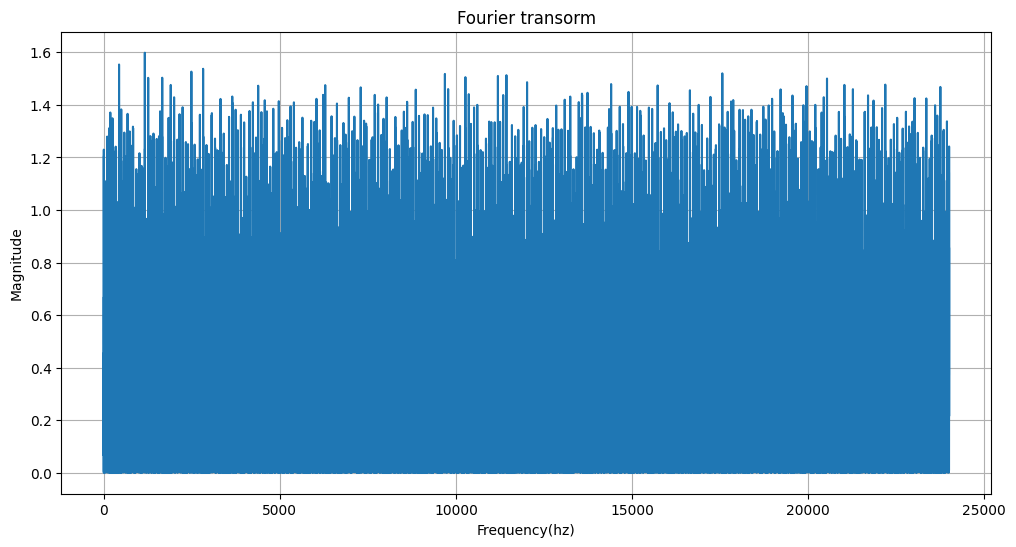

In [ ]:
f, fourier_transform_of_signal = fourier_transform(fs=fs, signal=signal)
plt.figure(figsize=(12, 6))
plt.plot(f, fourier_transform_of_signal)
plt.xlabel('Frequency(hz)')
plt.ylabel('Magnitude')
plt.title('Fourier transorm')
plt.grid(True)
plt.show()

In [ ]:
print(f[np.argmax(fourier_transform_of_signal)])

1168.1667397656304


In [ ]:
def segment_signal(signal, segment_size=128, overlap=0):
    step = segment_size - overlap
    segments = [signal[i:i + segment_size] for i in range(0, len(signal) - segment_size + 1, step)]
    return np.array(segments)

In [ ]:
segments = segment_signal(signal, segment_size=128, overlap=64)
print(f"Number of sections: {segments.shape[0]}")


Number of sections: 7587


In [ ]:
import pandas as pd
df = pd.DataFrame(segments.squeeze())


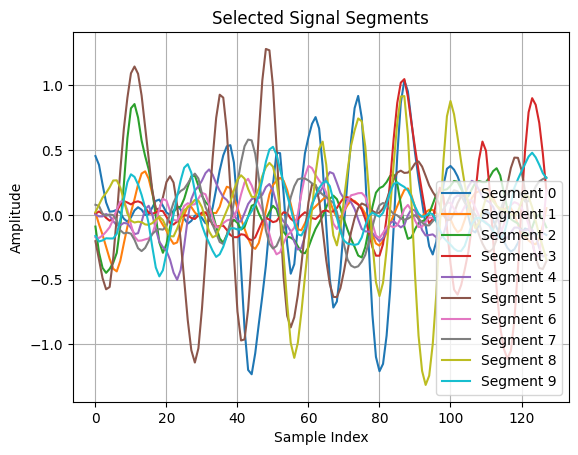

In [ ]:
plt.figure()

for i in range(10):
    plt.plot(df.iloc[i * 3], label=f'Segment {i}')

plt.title("Selected Signal Segments")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

def extract_features(signal):
    mean_value = np.mean(signal)
    std_dev = np.std(signal)
    rms_value = np.sqrt(np.mean(signal ** 2))
    return mean_value, std_dev, rms_value


In [ ]:
features = [extract_features(segment) for segment in df.values]
df_features = pd.DataFrame(features, columns=['Mean', 'Std Dev', 'RMS'])

In [ ]:
df_features.to_csv("features.csv")


In [ ]:
from google.colab import files
files.download("features.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>